### Student Information
Name:吳宗霖

Student ID:B114020045

GitHub ID:ichika2004

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
import pandas as pd
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap



[nltk_data] Downloading package punkt to /Users/wuzonglin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/wuzonglin/anaconda/anaconda3/envs/lab/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wuzonglin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wuzonglin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df.head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [6]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df['text'] = df['text'].astype(str)
df['cleaned_text'] = df['text'].str.lower()

#移除標點符號和非字母數字字符
df['cleaned_text'] = df['cleaned_text'].apply(
    lambda x: re.sub(r'[^a-z0-9\s]', '', x)
)

df['cleaned_text'] = df['cleaned_text'].apply(
    lambda x: re.sub(r'\d+', '', x)
)
english_stopwords = set(stopwords.words('english'))
financial_stopwords = {'stock', 'buy', 'sell', 'like', 'get', 'would', 'one', 'go'} 

all_stopwords = english_stopwords.union(financial_stopwords)

def remove_stopwords(text):
    words = word_tokenize(text)
    # 移除停用詞，並移除單一字母詞 
    filtered_words = [word for word in words if word not in all_stopwords and len(word) > 1]
    return " ".join(filtered_words)

df['processed_text'] = df['cleaned_text'].apply(remove_stopwords)

# 顯示清理前後的對比
print("\n--- 文本清理前後對比 (前 5 筆) ---")
print(df[['text', 'processed_text']].head())


--- 文本清理前後對比 (前 5 筆) ---
                                                text  \
0                                   Calls on retards   
1  Stunt as in like why did they even make a big ...   
2                  Seeing lots of red in the ticker.   
3  Vision Marine Technologies Inc. is rewriting t...   
4                           He didn’t say thank you.   

                                      processed_text  
0                                      calls retards  
1  stunt even make big deal starting first place ...  
2                             seeing lots red ticker  
3  vision marine technologies inc rewriting water...  
4                                    didnt say thank  


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# 假設 df 已經載入並完成小寫化、移除標點等初步清理
# -----------------------------------------------------------
# 執行文本清理的關鍵步驟：移除停用詞
english_stopwords = set(stopwords.words('english'))
financial_stopwords = {'stock', 'buy', 'sell', 'like', 'get', 'would', 'one', 'go', 'know'}
all_stopwords = english_stopwords.union(financial_stopwords)

def remove_stopwords(text):
    # 確保文本不是浮點數或 None
    if pd.isna(text): return ""
    
    # 重新運行清理步驟以確保一致性（如果前面的步驟沒問題，這會是重複的）
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in all_stopwords and len(word) > 1]
    return " ".join(filtered_words)

df['processed_text'] = df['text'].apply(remove_stopwords)

# -----------------------------------------------------------
# 建立 TDM
data_to_vectorize = df['processed_text'].dropna()
count_vect = CountVectorizer(max_features=5000)

X_tdm = count_vect.fit_transform(data_to_vectorize)
terms = count_vect.get_feature_names_out()

tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=data_to_vectorize.index)

print(f"TDM 形狀: {tdm_df.shape}")

TDM 形狀: (847, 4097)


In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

# 將 TDM 轉換為 TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_tdm)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=terms, index=data_to_vectorize.index)

print(f"TF-IDF 矩陣形狀: {tfidf_df.shape}")
print("TF-IDF 轉換完成。")

TF-IDF 矩陣形狀: (847, 4097)
TF-IDF 轉換完成。


In [11]:
from PAMI.frequentPattern.basic import FPGrowth
import time

MIN_SUP = 20

print(f"\n--- 執行 FPGrowth (Min Sup = {MIN_SUP}) ---")

try:
    start_time = time.time()
    
    fp_obj = FPGrowth.FPGrowth(iFile=reddit_transactions, minSup=MIN_SUP)
    fp_patterns = fp_obj.mine()
    
    runtime = time.time() - start_time
    
    if fp_patterns is None:
        fp_patterns = {}
        print("!!! 警告：FPGrowth 返回 None。已將結果替換為空集。")
    
    pattern_count = len(fp_patterns)
    
    print(f"運行時間: {runtime:.4f} 秒")
    print(f"找到的總頻繁模式數量: {pattern_count}")
    
    if pattern_count > 0:
        print("部分 FPGrowth 模式 (模式: 支持度):", list(fp_patterns.items())[:3])
    else:
        print("未找到任何模式。請嘗試降低 Min Sup。")

except Exception as e:
    print(f"\n!!! FPGrowth 執行失敗 !!!")
    print(f"錯誤訊息: {e}")


--- 執行 FPGrowth (Min Sup = 20) ---
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
!!! 警告：FPGrowth 返回 None。已將結果替換為空集。
運行時間: 0.0448 秒
找到的總頻繁模式數量: 0
未找到任何模式。請嘗試降低 Min Sup。


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


y = df.loc[tfidf_df.index, 'label'].astype(int) 
X = tfidf_df # 使用 TF-IDF 矩陣作為特徵

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y 
)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("\n" + "="*50)
print("             Reddit 情感分類結果 (基於 TF-IDF)")
print("="*50)
print(f"模型準確度 (Accuracy): {accuracy:.4f}")
print("\n分類報告 (Classification Report):")
print(report)


             Reddit 情感分類結果 (基於 TF-IDF)
模型準確度 (Accuracy): 0.6000

分類報告 (Classification Report):
              precision    recall  f1-score   support

          -1       0.62      0.48      0.54        63
           0       0.59      0.85      0.70        85
           1       0.00      0.00      0.00        22

    accuracy                           0.60       170
   macro avg       0.41      0.44      0.41       170
weighted avg       0.53      0.60      0.55       170



/var/folders/69/jmsd1j5s5bv28g0b7vjh9mfc0000gp/T/ipykernel_65202/3275934270.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.index, y=top_words.values, palette="viridis")


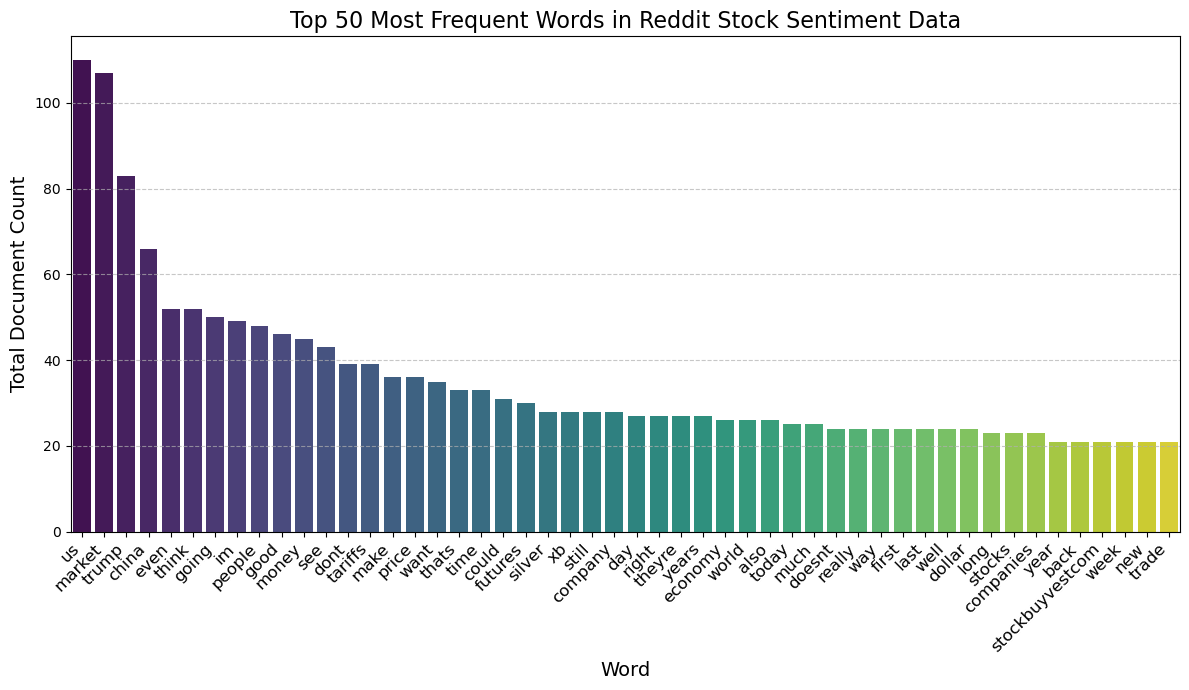

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

top_words = tdm_df.sum().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_words.index, y=top_words.values, palette="viridis")

plt.title('Top 50 Most Frequent Words in Reddit Stock Sentiment Data', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Total Document Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/69/jmsd1j5s5bv28g0b7vjh9mfc0000gp/T/ipykernel_65202/1761374420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette="coolwarm")


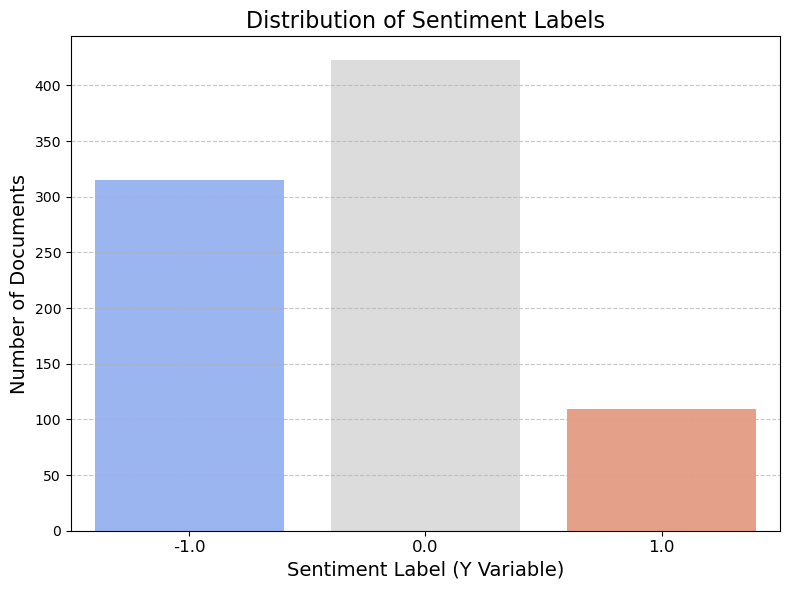

In [16]:

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette="coolwarm")

plt.title('Distribution of Sentiment Labels', fontsize=16)
plt.xlabel('Sentiment Label (Y Variable)', fontsize=14)
plt.ylabel('Number of Documents', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here